In [3]:
pressures_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        pressures_au.append(value_in_second_column)
pressures_GPa = [x* 2.9421015697e4 for x in pressures_au]
print(pressures_GPa)

[-20.477343977939405, -20.56169250415747, -14.84306771124407, -1.110408380198499, 5.625629622049159, 32.60032219848741]


In [49]:
import os
import matplotlib.pyplot as plt

colours = ['#ffba08', '#f48c06', '#e85d04', '#dc2f02', '#9d0208', '#370617']
#pairs = ['111','121', '131', '221', '231','331']

def plot_all_p_for_pair(pair,row,column, lower_y, upper_y, legend= False, save = False):
    colours = ['#ffba08', '#f48c06', '#e85d04', '#dc2f02', '#9d0208', '#370617']
    pressures = [1, 2, 3, 4, 5, 6]
    parent_directory = 'D:/MSc/summer_project/'
    directories = [os.path.join(parent_directory, 'p' + str(pressure)) for pressure in pressures]
    all_x_values = []
    all_y_values = []

    g_label = ''
    for character in pair[:-1]:
        if character == '1':
            g_label += 'O'
        elif character == '2':
            g_label += 'C'
        elif character == '3':
            g_label += 'Na'
        else:
            print('Invalid character:', character)
            break
    title_label = g_label[:1] + '-' + g_label[1:]

    for dir in directories:
        file_path = os.path.join(dir, 'rdf.out' + pair + '.txt')
        with open(file_path, 'r') as file:
            data = file.readlines()
            x_values = []
            y_values = []
            for line in data:
                x, y = map(float, line.split())  # Split the line and convert to floats
                x_values.append(x)
                y_values.append(y)
            x_values = [x*0.529177249 for x in x_values] # converting into angstrom
            all_x_values.append(x_values)
            all_y_values.append(y_values)
    
    ax = axes[row,column]

    for i in range(6):
        x_values = all_x_values[i]
        y_values = all_y_values[i]
        title_pressure = "{:.2f}".format(pressures_GPa[i])
        label = 'P = {} GPa'.format(title_pressure)
        colour = colours[i]
        ax.plot(x_values, y_values, label = label, color = colour)

    font_size = 8
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(font_size)

    if legend == True:
        ax.legend(fontsize=font_size, ncol=3, loc='center', bbox_to_anchor=(-0.25, -0.5))
    else:
        pass
    #ax.set_yticks([x for x in range(upper_y +1)])
    ax.set_xticks([x*2 for x in range(28)])
    ax.set_xlim(-1,15)
    ax.set_ylim(lower_y, upper_y)
    ax.set_xlabel('r [Å]')
    ax.set_ylabel('$g_{' + g_label + '}$(r)')

    #plt.title('Radial Distribution Functions for ' + title_label)
    if save == True:
        plt.savefig('D:/MSc/summer_project/rdfs_for_' + title_label,dpi=1000)
    else:
        pass

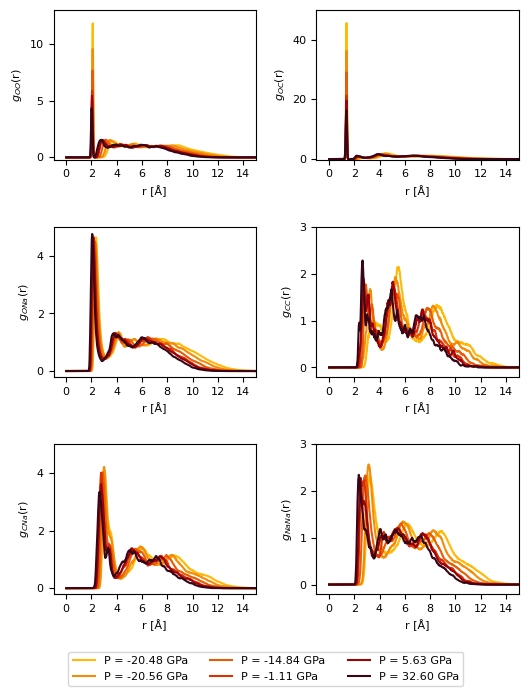

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))
plt.subplots_adjust(hspace=0.45, wspace = 0.3)

plot_all_p_for_pair('111', row = 0, column = 0, lower_y = -0.2, upper_y = 13)
plot_all_p_for_pair('121', row = 0, column = 1, lower_y = -0.2, upper_y = 50)

plot_all_p_for_pair('131', row = 1, column = 0, lower_y = -0.2, upper_y = 5)
plot_all_p_for_pair('221', row = 1, column = 1, lower_y = -0.2, upper_y = 3)

plot_all_p_for_pair('231', row = 2, column = 0, lower_y = -0.2, upper_y = 5)
plot_all_p_for_pair('331', row = 2, column = 1, lower_y = -0.2, upper_y = 3, legend = True)
plt.subplots_adjust(bottom=0.15)

plt.savefig('D:/MSc/summer_project/rdfs_for_all_pairs_all_pressures', dpi=1000)
plt.show()

<Figure size 640x480 with 0 Axes>